# View single Fits file


- Creation : Monday 2016 June 6th
- Author Sylvie Dagoret-Campagne (SDC adapted for LSST from Matt Craig's example notebook)
- affiliation : LAL/IN2P3/CNRS


The purpose is to shows the content of a fits file, or equvalently to check the written fits file is correct.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits

import ccdproc
print 'ccdproc version',ccdproc.__version__

from astropy.modeling import models

ccdproc version 1.0.1


In [2]:
from scipy import stats  
import os
from datetime import datetime, timedelta

In [3]:
import libMonocamBaseImages

In [4]:
now=datetime.utcnow()  # choose UTC time
datestr=str(now)
print 'standard date format for the analysis :',datestr
#  want the following format '2016-05-10T11:55:27.267'
date_of_analysis=now.strftime('%Y-%m-%dT%H:%M:%S')
print 'fits date format for the analysis : ',date_of_analysis

standard date format for the analysis : 2016-06-07 10:13:26.120831
fits date format for the analysis :  2016-06-07T10:13:26


In [5]:
NB_OF_CHAN_AMPL=16    # 16 images in each of the fits file

## working with master bias and master dark

In [6]:
path='.'
basefilename='masterbias_ostrim_1.fits' # check master bias
basefilename='masterdarkscaled_ostrim_1.fits' # check master dark
filename=os.path.join(path,basefilename)
vmin=-2
vmax=2

# working with 

In [7]:
path='/Users/dagoret-campagnesylvie/iraf/MonoCamMay2016/20160509'
basefilename='skyflats_10.fits'
filename=os.path.join(path,basefilename)
vmin=20000
vmax=22000

In [8]:
allrawimg = []
for chan in range(1,NB_OF_CHAN_AMPL+1,1):
    ccd_chan = ccdproc.CCDData.read(filename, hdu=chan,unit="adu") 
    allrawimg.append(ccd_chan)

In [ ]:
allrawimg[0].Header

In [10]:
#header=allrawimg[0][0].header
#header['DATE-ANA']=date_of_analysis
#header

In [11]:
def ShowImagesSet(ccdlist,V_MIN=-1,V_MAX=1):
    '''
    Shows the whole set of CCD images
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
     
    NX=8 # number of images along the horizontal axis
    NY=2 # number of images along the vertical axis
    
    f, axarr = plt.subplots(NY,NX,sharex='col', sharey='row',figsize=(15,15)) # figure organisation
    
    f.subplots_adjust(hspace=0.125,wspace=0.1)

    for index in range(NB_OF_CHAN_AMPL):  
        ix=index%8
        iy=index/8
        image_data = ccdlist[index].data
        #V_MIN=image_data.flatten().min()
        #V_MAX=image_data.flatten().max()
        im=axarr[iy,ix].imshow(image_data,vmin=V_MIN,vmax=V_MAX)  # plot the image
        if ix==0 and iy==0:
            im0=im
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_title(plottitle)
    
    title='CCD-MAPS file {}'.format(basefilename)

    cax = f.add_axes([0.95, 0.12, 0.03, 0.78]) # [left,bottom,width,height]    
    f.colorbar(im0, cax=cax)
   
    plt.suptitle(title,size=16)
    plt.savefig('viewccd.pdf', bbox_inches='tight')

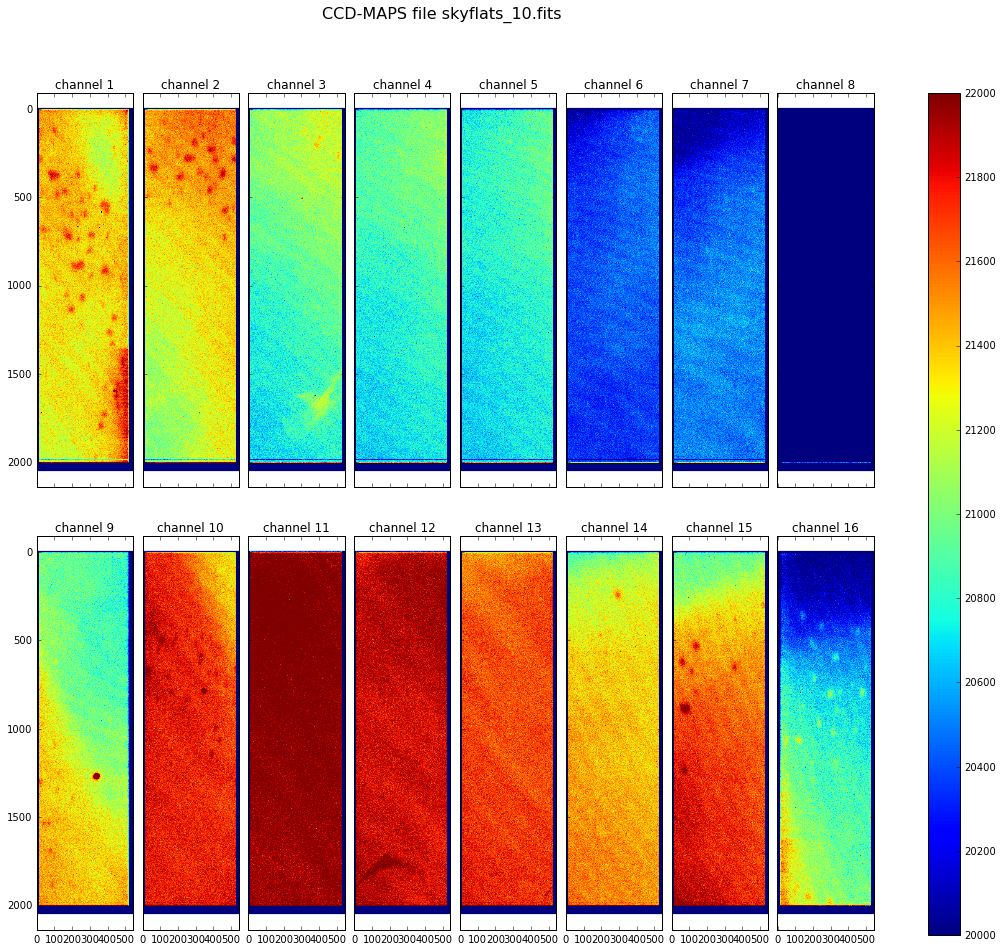

In [12]:

ShowImagesSet(allrawimg,V_MIN=vmin,V_MAX=vmax)

In [ ]:
def ShowHistoSet(ccdlist,V_MIN=-1,V_MAX=1):
    '''
    Shows the whole set of CCD histograms
     - inputs argument:
       path : path of the fits file
       filename of the fits file
     - output the images of the whole CCD   
    '''
   
    
    NX=4 # number of images along the horizontal axis
    NY=4 # number of images along the vertical axis
    BIASMIN=-10.0
    BIASMAX=10.0
    BINWIDTH=0.25
    f, axarr = plt.subplots(NY,NX,figsize=(20,20)) # figure organisation
    #f, axarr = plt.subplots(NX,NY,sharex=True, sharey=True,figsize=(20,20))
    f.subplots_adjust(hspace=0.5,wspace=0.5)

    for index in range(NB_OF_CHAN_AMPL):  
        ix=index%4
        iy=index/4
        image_data = image_data = ccdlist[index].data
        data=image_data.flatten()
        axarr[iy,ix].hist(data,bins=np.arange(min(data), max(data) + BINWIDTH, BINWIDTH),facecolor='blue', alpha=0.75,log=True)  # plot the image
        #axarr[iy,ix].hist(data,bins=np.arange(min(data), max(data) + BINWIDTH, BINWIDTH),facecolor='blue', alpha=0.70,log=False)  # plot the image
        plottitle='channel {}'.format(index+1)
        axarr[iy,ix].set_xlim(BIASMIN,BIASMAX)
        axarr[iy,ix].set_title(plottitle)
        axarr[iy,ix].set_xlabel('ADU')
        axarr[iy,ix].grid(True)
        #axarr[iy,ix].set_yscale('log')

    plt.yscale('log')
    title='CCD count Histo file {}'.format(basefilename)
    plt.suptitle(title,size=16)
    plt.savefig('ccdhistos.pdf', bbox_inches='tight')

In [ ]:
ShowHistoSet(allrawimg,V_MIN=vmin,V_MAX=vmax)